<a href="https://colab.research.google.com/github/Amansaini123/Final-Projects/blob/master/Swarm_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UPLOADING THE CSV FILES**

In [1]:
from google.colab import files
uploaded=files.upload()

Saving links.csv to links.csv
Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv
Saving tags.csv to tags.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import sorting
import random
from sklearn.preprocessing import MinMaxScaler
import math
from collections import Counter,OrderedDict

**IMPORTING THE DATA**

In [3]:
movie_data=pd.read_csv('movies.csv')
links=pd.read_csv('links.csv')
ratings=pd.read_csv('ratings.csv')
tags=pd.read_csv('tags.csv')

In [5]:
# Taking the unique user id and movie id

user_rating=np.zeros((len(np.unique(ratings['userId'])),len(np.unique(ratings['movieId']))))
train=np.zeros(user_rating.shape)
test=np.zeros(user_rating.shape)
print(user_rating.shape)

(610, 9724)


**USER RATING   (ANALYSING THE DATA)**

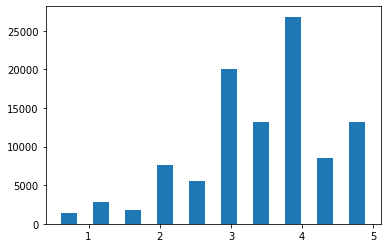

In [6]:
# Making the histogram

# Rating varies between 1 to 5
plt.hist(ratings['rating'],rwidth=0.5)
plt.show()



---
**Number of users and Number of movies are**


In [7]:
print("Number of Users :",len(np.unique(ratings["userId"])))
print("Number of movies :",len(np.unique(movie_data["movieId"])))

Number of Users : 610
Number of movies : 9742


**15 Movie with hisghest user rating are**

In [8]:
# Movie with highest user rating are :

print("Movies with highest number of user ratings :")
for i in sorted(Counter(ratings["movieId"]).items(), key=lambda x: x[1],reverse=True)[:15]:
    print(movie_data["title"][i[0]])

Movies with highest number of user ratings :
Age of Innocence, The (1993)
I Love Trouble (1994)
Virtuosity (1995)
Cemetery Man (Dellamorte Dellamore) (1994)
Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991)
Quiz Show (1994)
Terminal Velocity (1994)
Jupiter's Wife (1994)
Last Dance (1996)
Aristocats, The (1970)
Billy Elliot (2000)
Jumanji (1995)
Picture Perfect (1997)
Georgia (1995)
Autumn in New York (2000)


In [9]:
print("User who gave more ratings (User Number,Number of movies) :")
sorted(Counter(ratings["userId"]).items(), key=lambda x: x[1],reverse=True)[:15]

User who gave more ratings (User Number,Number of movies) :


[(414, 2698),
 (599, 2478),
 (474, 2108),
 (448, 1864),
 (274, 1346),
 (610, 1302),
 (68, 1260),
 (380, 1218),
 (606, 1115),
 (288, 1055),
 (249, 1046),
 (387, 1027),
 (182, 977),
 (307, 975),
 (603, 943)]

**USER RATING MATRIX**

In [10]:
for i in np.unique(ratings['userId']):
    k=ratings[ratings['userId']==i]
    for j in range(len(k)):
        if (k['movieId'].iloc[j]-1<=9742):
            user_rating[i-1,k['movieId'].iloc[j]-1]=k['rating'].iloc[j]

**Train Test Split of 80-20**

In [11]:
t=int(np.count_nonzero(user_rating)*80/100)
non_zero=[]
for i in range(user_rating.shape[0]):
    for j in range(user_rating.shape[1]):
        if(user_rating[i,j]!=0):
            non_zero.append([i,j])
k=0
while(k<=t):
    i=random.randint(1,len(non_zero)-1)
    train[non_zero[i][0],non_zero[i][1]]=user_rating[non_zero[i][0],non_zero[i][1]]
    non_zero.remove(non_zero[i])
    k=k+1

In [12]:
train

array([[0. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [13]:
for i in non_zero:
    test[i[0],i[1]]=user_rating[i[0],i[1]]

In [14]:
test

array([[4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Matrix Factorization using Gradient Descent**

In [15]:
user=np.random.rand(user_rating.shape[0],5)
movies=np.random.randint(4,size=(user_rating.shape[1],5))
I=np.zeros(user_rating.shape)
Itest=np.zeros(user_rating.shape)
Itrain=np.zeros(user_rating.shape)

In [16]:
for i in range(user_rating.shape[0]):
    for j in range(user_rating.shape[1]):
        if(user_rating[i][j]!=0):
            I[i][j]=1

In [17]:
def gradient(user,movies,result):
    user=user+2*0.000001*(result.dot(movies))
    movies=movies+2*0.000001*(result.T.dot(user))
    return(user,movies)
def prediction(user,movies,user_r,k):
    error=[]
    for i in range(k):
        result=np.multiply((user_r-user.dot(movies.T)),I)
        user,movie=gradient(user,movies,result)
        error.append(np.sum(np.square(result)))
    return(error,user,movies)

In [18]:
def accuracy (user,movies,data,k):
    error1=prediction(user,movies,data,k)
    result1=error1[1].dot(error1[2].T)
    e=0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if(data[i,j]!=0):
                e+=(data[i,j]-result1[i,j])**2
    return(math.sqrt(e/np.count_nonzero(data)),result1)

In [19]:
train_ac,train_result=accuracy(user,movies,train,1000)

In [20]:
train_ac

1.6631464237531344

In [21]:
test_ac,test_result=accuracy(user,movies,test,1000)

In [22]:
test_ac

2.8827957564181603

**Regularised Matrix Factorization**

In [23]:
beta=0.0001
def prediction2(user,movies,user_r,k):
    error=[]
    for i in range(k):
        result=np.square(np.multiply((user_r-user.dot(movies.T)),I))+beta*((np.sum(np.square(user))+(np.sum(np.square(movies)))))
        user,movies=gradient2(user,movies,result)
        error.append(np.sum(1/(2*user_r.shape[0])*np.square(result)))
    return(error,user,movies)

def gradient2(user,movies,result):
    user=user-0.000000001*(2*(result.dot(movies))+2*beta*(np.sum(user)))
    movies=movies-0.00000001*(2*(result.T.dot(user))+2*beta*np.sum(movies))
    return(user,movies)

In [24]:
def accuracy_regularised(user,movies,data,k):
    error2=prediction2(user,movies,data,k)
    result2=error2[1].dot(error2[2].T)
    e=0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if(data[i,j]!=0):
                e+=(data[i,j]-result2[i,j])**2
    return(math.sqrt(e/np.count_nonzero(data)),result2)

In [25]:
train_ac_r,train_result_re=accuracy_regularised(user,movies,train,1000)
test_ac_r,test_result_re=accuracy_regularised(user,movies,test,1000)

In [26]:
train_ac_r

3.633071644565218

In [27]:
test_ac_r

3.63362959895631

**Sliding Window**

In [28]:
def gradient_sliding_w(user,movies,result):
    user=user+2*0.0000001*(result.dot(movies))
    movies=movies+2*0.0000001*(result.T.dot(user))
    return(user,movies)
def prediction_sliding_w(user,movies,user_r,k,win_size):
    error=[]
    win=[]
    for i in range(k):
        result=np.multiply((user_r-user.dot(movies.T)),I)
        user,movie=gradient_sliding_w(user,movies,result)
        e=np.sum(np.square(result))
        error.append(e)
        if(i<win_size):
            win.append(e)
        else:
            mean1=sum(win)/win_size
            del win[0]
            win.append(e)
            mean2=sum(win)/win_size
            if(mean1<mean2):
                break
            else:
                continue
    return(error,user,movies)

In [29]:
def accuracy_sliding_w(user,movies,data,k,win_size):
    error1=prediction_sliding_w(user,movies,data,k,win_size)
    result1=error1[1].dot(error1[2].T)
    e=0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if(data[i,j]!=0):
                e+=(data[i,j]-result1[i,j])**2
    return(math.sqrt(e/np.count_nonzero(data)),result1)

In [30]:
train_ac_sw,train_result_sw=accuracy_sliding_w(user,movies,train,2000,10)
test_ac_sw,test_result_sw=accuracy_sliding_w(user,movies,test,2000,10)

In [31]:
train_ac_sw

1.7130019483560677

In [32]:
test_ac_sw

2.4454969771183093

**Line Search**




In [33]:
def gradient_line_search(user,movies,result,alpha):
    user=user+2*alpha*(result.dot(movies))
    movies=movies+2*alpha*(result.T.dot(user))
    return(user,movies)
def prediction_line_search(user,movies,user_r,k,threshold):
    error=[]
    jold=0
    jnew=0
    alpha=1/9000
    for i in range(k):
        result=np.multiply((user_r-user.dot(movies.T)),I)
        jnew=np.sum(np.square(result))
        error.append([jnew])
        if(abs(jold-jnew)>threshold):
            alpha=alpha/10
            user,movie=gradient_line_search(user,movies,result,alpha)
        else:
            break
        jold=jnew
    return(error,user,movies)

In [34]:
def accuracy_line_search(user,movies,data,k,win_size):
    error1=prediction_line_search(user,movies,data,k,win_size)
    result1=error1[1].dot(error1[2].T)
    e=0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if(data[i,j]!=0):
                e+=(data[i,j]-result1[i,j])**2
    return(math.sqrt(e/np.count_nonzero(data)),result1)

In [35]:
train_ac_ls,train_result_ls=accuracy_line_search(user,movies,train,1000,0.001)
test_ac_ls,test_result_ls=accuracy_line_search(user,movies,test,1000,0.001)

In [36]:
train_ac_ls

1.9450848357623758

In [37]:
test_ac_ls

1.9363991056973726

**PSO**

In [38]:
def update_param(param,c1,alpha):
    user=param['user']+alpha*(c1*param['du']-(1-c1)*(param['Best_user']-param['user']))
    movies=param['movies']+alpha*(c1*param['dm']-(1-c1)*(param['Best_movies']-param['movies']))
    return(user,movies)
def gradient(user,movies,result):
    du=result.dot(movies)
    dw=result.T.dot(user)
    return(du,dw)
def cost(user,movies,user_r,k,c1,alpha):
    error=[]
    min_cost=100000000000
    best_u=user
    best_m=movies
    for i in range(k):
        result=np.multiply((user_r-user.dot(movies.T)),I)
        error.append(np.sum(np.square(result)))
        if(min_cost>error[i]):
            min_cost=error[i]
            best_u=user
            best_m=movies
        du,dm=gradient(user,movies,result)
        param={'du':du,'dm':dm,'user':user,'movies':movies,'result':result,'Best_user':best_u,'Best_movies':best_m}
        user,movies=update_param(param,c1,alpha)
    return(error,user,movies)

In [39]:
def accuracy_pso(user,movies,data,k,c1,alpha):
    error1=cost(user,movies,data,k,c1,alpha)
    result1=error1[1].dot(error1[2].T)
    e=0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if(data[i,j]!=0):
                e+=(data[i,j]-result1[i,j])**2
    return(math.sqrt(e/np.count_nonzero(data)),result1)

In [40]:
train_ac_pso,train_result_pso=accuracy_pso(user,movies,train,1000,0.9,0.0001)
test_ac_pso,test_result_pso=accuracy_pso(user,movies,test,1000,0.9,0.0001)

In [41]:
train_ac_pso

1.15734939608026

In [42]:
test_ac_pso

2.8797161733501393

**RECOMENDATION**

In [43]:
def find_movie(rating_matrix):
    l=[]
    for i in range(rating_matrix.shape[0]):
        t=[]
        q=sorted(range(len(rating_matrix[0])), key=lambda k: rating_matrix[i][k])
        q.reverse()
        for j in q:
            if(user_rating[i,j]==0):
                t.append(j)
        l.append(t)
    return(l)

In [44]:
def recommendation(user,n,l):
    i=0
    while(n>=0):
        print(l[user][i],"    ",movie_data["title"][l[user][i]])
        i=i+1
        n=n-1

In [45]:
t=prediction(user,movies,user_rating,1000)
predicted_matrix=t[1].dot(t[2].T)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


In [46]:
recommendation(2,5,find_movie(predicted_matrix))

9723      BlacKkKlansman (2018)
9722      Iron Soldier (2010)
9721      SuperFly (2018)
9720      Mission: Impossible - Fallout (2018)
9719      Spiral (2018)
9718      Boundaries (2018)


In [47]:
t_re=prediction2(user,movies,user_rating,100)
predicted_matrix_re=t_re[1].dot(t_re[2].T)

In [48]:
recommendation(2,5,find_movie(predicted_matrix_re))

7553      Hard Ticket to Hawaii (1987)
5260      Spider-Man 2 (2004)
688      Gaslight (1944)
8606      The Voices (2014)
8168      Captain America (1979)
8159      Star Trek Into Darkness (2013)


In [49]:
t_sw=prediction_sliding_w(user,movies,user_rating,1000,15)
predicted_matrix_sw=t_sw[1].dot(t_sw[2].T)

In [50]:
recommendation(2,5,find_movie(predicted_matrix_sw))

8606      The Voices (2014)
8168      Captain America (1979)
7553      Hard Ticket to Hawaii (1987)
5260      Spider-Man 2 (2004)
688      Gaslight (1944)
8159      Star Trek Into Darkness (2013)


In [51]:
t_ls=prediction_line_search(user,movies,user_rating,1000,0.00001)
predicted_matrix_ls=t_ls[1].dot(t_ls[2].T)

In [52]:
recommendation(2,5,find_movie(predicted_matrix_ls))

8606      The Voices (2014)
8168      Captain America (1979)
7553      Hard Ticket to Hawaii (1987)
5260      Spider-Man 2 (2004)
688      Gaslight (1944)
8159      Star Trek Into Darkness (2013)


In [53]:
t_pso=cost(user,movies,user_rating,1000,0.9,0.00001)
predicted_matrix_pso=t_pso[1].dot(t_pso[2].T)

In [54]:
recommendation(2,5,find_movie(predicted_matrix_pso))

7553      Hard Ticket to Hawaii (1987)
5260      Spider-Man 2 (2004)
688      Gaslight (1944)
8606      The Voices (2014)
8168      Captain America (1979)
8159      Star Trek Into Darkness (2013)


In [55]:
def show(mat):
    rate=[]
    for i in range(user_rating.shape[0]):
        for j in range(user_rating.shape[1]):
            if(user_rating[i][j]!=0):
                rate.append(mat[i][j])
    m=min(rate)
    n=max(rate)
    plt.hist([(r-m)/(n-m) for r in rate],rwidth=0.5)
    plt.show()

Using matrix Regularisation :


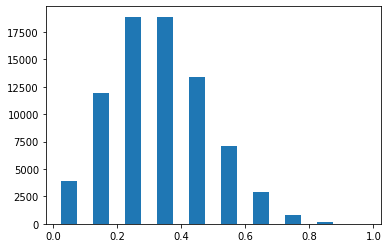

In [60]:
print("Using matrix Regularisation :")
show(predicted_matrix_re)

Using line search :


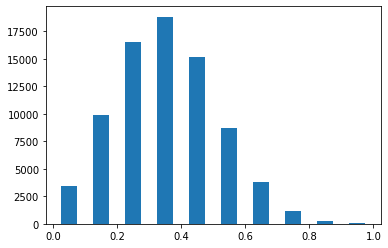

In [61]:
print("Using line search :")
show(predicted_matrix_ls)